Import packages:

In [1]:
import random
import os

In [2]:
%matplotlib inline
from see import Segmentors
from see import JupyterGUI
from see import base_classes

Download data from KOMATSUNA:

In [3]:
#The following code will download the dataset to the Images_Data folder
#from see import DataDownload as dd

#dd.downloadKOMATSUNA(folder='./Image_Data/KOMATSUNA/')

In [4]:
label_list = os.listdir("Image_data/KOMATSUNA/rgbd_label/")
plant_list = os.listdir("Image_data/KOMATSUNA/rgbd_plant/")
label_list.sort()
plant_list.sort()

In [5]:
random.seed(1)

In [6]:
rand_plant_list = random.choices(plant_list, k=3)
rand_label_list = []
for i in rand_plant_list:
    list_item = i.replace("rgb", "label")
    rand_label_list.append(list_item)

In [7]:
from imageio import v3 as imageio
# put data in a pipeline
image_list = []
mydata = base_classes.pipedata()
mydata.count = 0
for i in rand_plant_list:
    mydata.count += 1
    path_to_plant = 'Image_data/KOMATSUNA/rgbd_plant/' + i
    img = imageio.imread(path_to_plant)
    image_list.append(img)
    mydata.append([img])

for i in rand_label_list:
    path_to_label = 'Image_data/KOMATSUNA/rgbd_label/' + i
    gmask = imageio.imread(path_to_label)
    mydata.gtruth.append(gmask)

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [8]:
from see.Segmentors import segmentor
from see.ColorSpace import colorspace
from see.Workflow import workflow
from see.Segment_Fitness import segment_fitness
from see import base_classes, GeneticSearch

#define an algorithm workflow
workflow.addalgos([colorspace, segmentor, segment_fitness])

[Errno 8] nodename nor servname provided, or not known


To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [9]:
#TODO This needs to be fixed Using the new syntax.
#my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [10]:
population = my_evolver.run(ngen=5)

Initializing a new random population
Generation 0/5 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	colorspace = YUV
	multichannel = True
	channel = 1
	algorithm = Morphological_Chan_Vese
	alpha1 = 0.94140625
	alpha2 = 0.7578125
	beta1 = 0.41796875
	beta2 = 0.1875
	gamma1 = 0.97265625
	gamma2 = 0.0546875
	n_segments = 6
	max_num_iter = 14

Time: 0.51 s
p_fitness=1.5

<class 'see.Workflow.workflow'> parameters: 
	colorspace = RGB
	multichannel = False
	channel = 1
	algorithm = SlicO
	alpha1 = 0.203125
	alpha2 = 0.6328125
	beta1 = 0.05859375
	beta2 = 0.04296875
	gamma1 = 0.05078125
	gamma2 = 0.015625
	n_segments = 6
	max_num_iter = 7

Time: 0.125 s
p_fitness=1.0611116250596948

<class 'see.Workflow.workflow'> parameters: 
	colorspace = YPbPr
	multichannel = True
	channel = 2
	algorithm = SlicO
	alpha1 = 0.875
	alpha2 = 0.98828125
	beta1 = 0.46484375
	beta2 = 0.6875
	gamma1 = 0.4609375
	gamma2 = 0.4375
	n_segments = 7
	max_num_iter = 10

Time: 0.145 s
p_fitness=0.66520

In [11]:
print(my_evolver.hof[0].fitness)

(0.46304493239560734,)


----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [12]:
params = my_evolver.hof[0]
fitness = params.fitness.values[0]
print(f'Best Individual ({fitness}):\n', params)

Best Individual (0.46304493239560734):
 ['XYZ', True, 2, 'Felzenszwalb', 0.875, 0.98828125, 0.46484375, 0.6875, 0.4609375, 0.37109375, 0, 10]


We can see the mask this individual generates by evaluating it, then plotting the result:

In [13]:
seg = workflow(params)
data = seg.runAlgo(mydata)

<class 'see.Workflow.workflow'> parameters: 
	colorspace = XYZ
	multichannel = True
	channel = 2
	algorithm = Felzenszwalb
	alpha1 = 0.875
	alpha2 = 0.98828125
	beta1 = 0.46484375
	beta2 = 0.6875
	gamma1 = 0.4609375
	gamma2 = 0.37109375
	n_segments = 0
	max_num_iter = 10

Time: 0.234 s


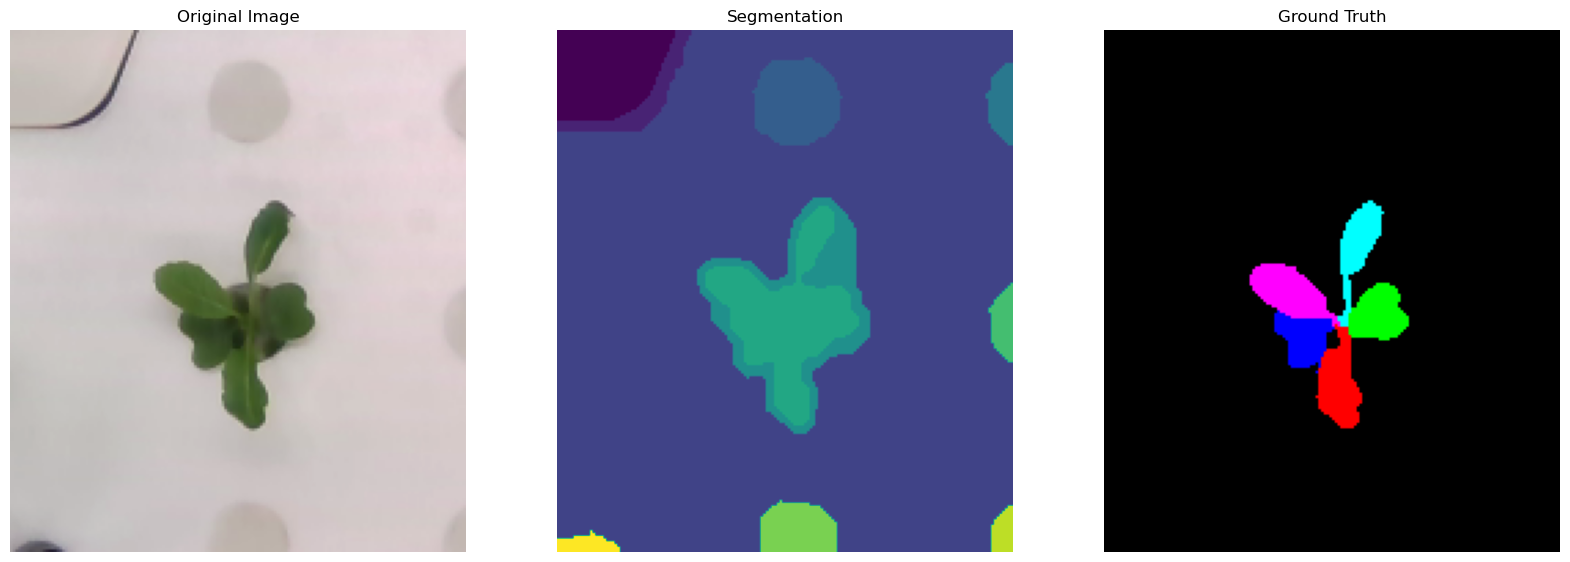

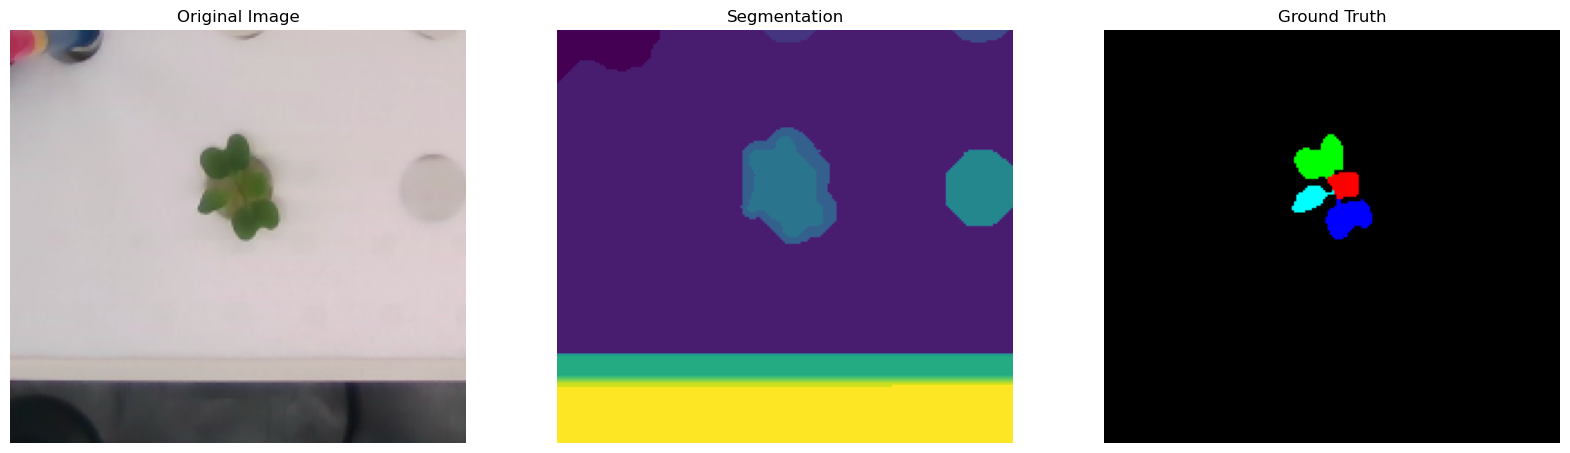

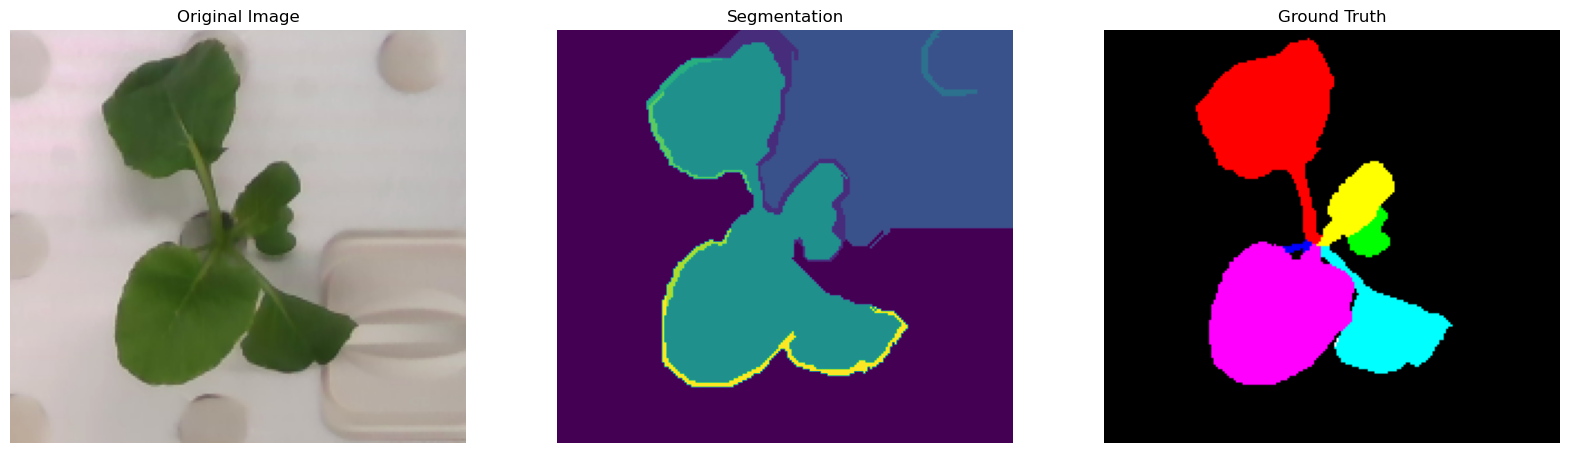

In [14]:
import matplotlib.pylab as plt
for i in range(len(data)):
    plt.figure(figsize=(20, 10))
    plt.subplot(131)
    plt.imshow(image_list[i])
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(data[i][-1])
    plt.title("Segmentation")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(data.gtruth[i])
    plt.title("Ground Truth")
    plt.axis('off')


plt.tight_layout
plt.show()

In [15]:
len(data)

3